# <center>Week 5-6 - Assignment</center>

<center><b>Prepare -  Tree Map, Area Chart & Stacked Area Chart</b></center>

<center><b><br>By<br></b></center>

<center><b>Shani Kumar<br></b></center>


### Introduction: Assignment Details

You need to submit 3 tree maps, 3 area charts and 3 stacked area charts using Tableau or PowerBI, Python and R using the data below (or your own datasets). You can also submit using D3. You can choose which library to use in Python or R, documentation is provided to help you decide and as you start to play around in the libraries, you will decide which you prefer.


### Source Data

https://content.bellevue.edu/cst/dsc/640/datasets/ex3-2.zip



In [1]:
# Impprt required libraries/packages
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt


# configure display of graph
%matplotlib inline

### Load data into a dataframe

In [2]:
# load the csv file as a data frame
expenditures = pd.read_csv('expenditures.txt', sep = '\t', header=0)
# summarize the shape of the dataset
print("Expenditures:\n")
print("Dataset Shape: ",expenditures.shape)
# see the sample of the data
print("Sample Data: ")
expenditures.head()

Expenditures:

Dataset Shape:  (350, 4)
Sample Data: 


,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [3]:
# load the csv file as a data frame
unemployement_rt = pd.read_csv('unemployement-rate-1948-2010.csv')
# summarize the shape of the dataset
print("Unemployment Rate:\n\nDataset Shape: ",unemployement_rt.shape)
# see the sample of the data
print("Sample Data: ")
unemployement_rt.head()

Unemployment Rate:

Dataset Shape:  (746, 4)
Sample Data: 


,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


## Tree Map

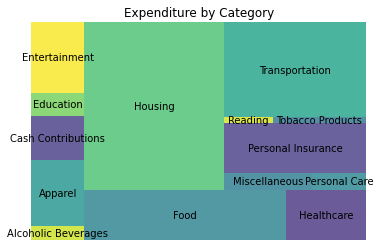

In [4]:
# Calculate total expenditure for categories
expenditures_cat = expenditures.groupby(['category'])['expenditure'].sum().reset_index()

# Plot tree map now
squarify.plot(sizes=expenditures_cat['expenditure'], 
              label=expenditures_cat['category'], 
              alpha=.8 )
plt.title('Expenditure by Category')
plt.axis('off')
plt.show()

## Area Chart

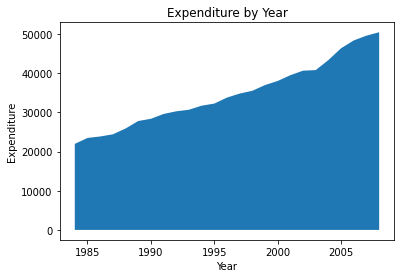

In [5]:
# Calculate total expenditure by year
expenditures_year = expenditures.groupby(['year'])['expenditure'].sum().reset_index()

# Area Chart
plt.fill_between(expenditures_year['year'], expenditures_year['expenditure'])
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure by Year')
plt.show()

## Stacked Area Chart

In [6]:
# Reorge the shape of dataset structure for stacked area chart
expenditures_reorg = expenditures.loc[:, expenditures.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
expenditures_reorg.reset_index(level=0, inplace=True)

#Get label name
labs = expenditures_reorg.columns[1:].values.tolist()

# see the sample of the data
print("After Reorg: ")
expenditures_reorg.head()

After Reorg: 


category,year,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
0,1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1,1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
2,1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
3,1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
4,1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093


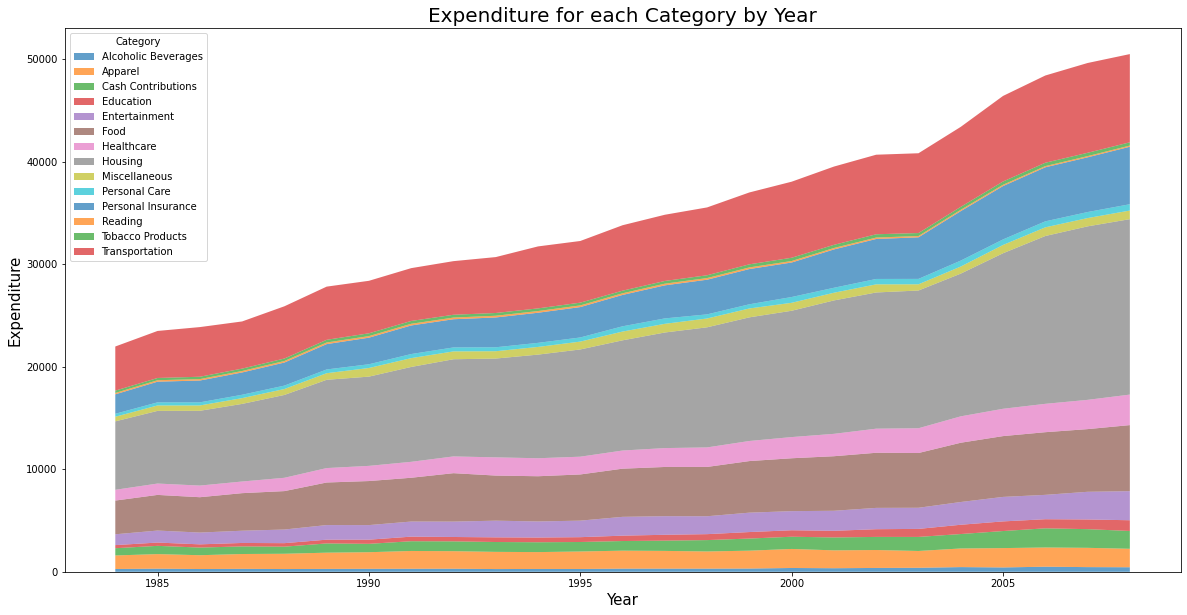

In [7]:
# Stacked Area Chart
plt.figure(figsize=(20,10))
plt.stackplot(expenditures_reorg['year'], 
              expenditures_reorg['Alcoholic Beverages'], 
              expenditures_reorg['Apparel'], 
              expenditures_reorg['Cash Contributions'],
              expenditures_reorg['Education'],
              expenditures_reorg['Entertainment'],
              expenditures_reorg['Food'],
              expenditures_reorg['Healthcare'],
              expenditures_reorg['Housing'],
              expenditures_reorg['Miscellaneous'],
              expenditures_reorg['Personal Care'],
              expenditures_reorg['Personal Insurance'],
              expenditures_reorg['Reading'],
              expenditures_reorg['Tobacco Products'],
              expenditures_reorg['Transportation'],
              labels=labs, alpha=0.7)
plt.title('Expenditure for each Category by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Expenditure', fontsize=15)
plt.legend(title='Category', fontsize=10, ncol=1, loc = 'upper left')